In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from stabletrees.random_forest import RandomForest,NaiveRandomForest,AbuRandomForest,ReevaluateRandomForest
from stabletrees.tree import BaseLineTree
from sklearn.ensemble import RandomForestRegressor
import sys
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd 
import datapreprocess

%cd ..
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)

c:\Users\mb-92\OneDrive\Skrivebord\studie\StableTrees


In [48]:
np.random.seed(0)
n = 5000

X = np.random.uniform(size=(n,1),low=0,high=4)
y = np.random.normal(loc=X.ravel()**2,scale=1,size = n)
X1,X2,y1,y2 = train_test_split(X,y,test_size=0.5,random_state=0)
X_test = np.random.uniform(size=(n,1),low=0,high=4)
y_test = np.random.normal(loc=X_test.ravel()**2,scale=1,size = n)
n_estimators = 300
rf = RandomForest(n_estimators,criterion="mse", adaptive_complexity=True).fit(X1,y1)
nrf = NaiveRandomForest(n_estimators,adaptive_complexity=True).fit(X1,y1)
aburf = AbuRandomForest(n_estimators,adaptive_complexity=True).fit(X1,y1)
rrf = ReevaluateRandomForest(n_estimators,adaptive_complexity=True).fit(X1,y1)
t = BaseLineTree(criterion="mse",adaptive_complexity=True).fit(X1,y1)
standard_rf = RandomForestRegressor(n_estimators,min_samples_leaf=5,random_state=0).fit(X1,y1)


standard_rf_pred1 = standard_rf.predict(X_test)
rf_pred1 = rf.predict(X_test)
nrf_pred1 = nrf.predict(X_test)
aburf_pred1 = aburf.predict(X_test)
rrf_pred1 = rrf.predict(X_test)
t_pred1 = t.predict(X_test)
print("initial:")
print(f"random forest:  {mean_squared_error(y_test,rf_pred1):.3f}")
print(f"naive forest: {mean_squared_error(y_test,nrf_pred1):.3f}")
print(f"abu forest: {mean_squared_error(y_test,aburf_pred1):.3f}")
print(f"reevaluate forest: {mean_squared_error(y_test,rrf_pred1):.3f}")
print(f"standard tree: {mean_squared_error(y_test,t_pred1):.3f}")
print(f"standard forest: {mean_squared_error(y_test,standard_rf_pred1):.3f}")
print("="*20, "\n")

rf.update(X,y)
nrf.update(X,y)
aburf.update(X,y)
rrf.update(X,y)
t.update(X,y)
standard_rf.fit(X,y)


def S2(pred1, pred2):
    return np.mean((pred1- pred2)**2)

rf_pred2 = rf.predict(X_test)
nrf_pred2 = nrf.predict(X_test)
aburf_pred2 = aburf.predict(X_test)
rrf_pred2 = rrf.predict(X_test)
t_pred2 = t.predict(X_test)
standard_rf_pred2 = standard_rf.predict(X_test)

print("update")
print(f"random forest: {mean_squared_error(y_test,rf_pred2):.3f}")
print(f"naive forest: {mean_squared_error(y_test,nrf_pred2):.3f}")
print(f"abu forest: {mean_squared_error(y_test,aburf_pred2):.3f}")
print(f"reevaluate forest: {mean_squared_error(y_test,rrf_pred2):.3f}")
print(f"standard tree: {mean_squared_error(y_test,t_pred2):.3f}")
print(f"standard forest: {mean_squared_error(y_test,standard_rf_pred2):.3f}")
print("="*20, "\n")
print("stability:")
print(f"random forest: {S2(rf_pred1,rf_pred2):.3f}")
print(f"naive forest: {S2(nrf_pred1,nrf_pred2):.3f}")
print(f"abu forest: {S2(aburf_pred1,aburf_pred2):.3f}")
print(f"reevaluate forest: {S2(rrf_pred1,rrf_pred2):.3f}")
print(f"standard tree: {S2(t_pred1,t_pred2):.3f}")
print(f"standard forest: {S2(standard_rf_pred1,standard_rf_pred2):.3f}")
print("="*20, "\n")



initial:
random forest:  1.010
naive forest: 1.010
abu forest: 1.010
reevaluate forest: 1.010
standard tree: 1.056
standard forest: 1.112

update
random forest: 1.001
naive forest: 1.000
abu forest: 1.002
reevaluate forest: 1.002
standard tree: 1.022
standard forest: 1.088

stability:
random forest: 0.018
naive forest: 0.007
abu forest: 0.014
reevaluate forest: 0.014
standard tree: 0.050
standard forest: 0.105



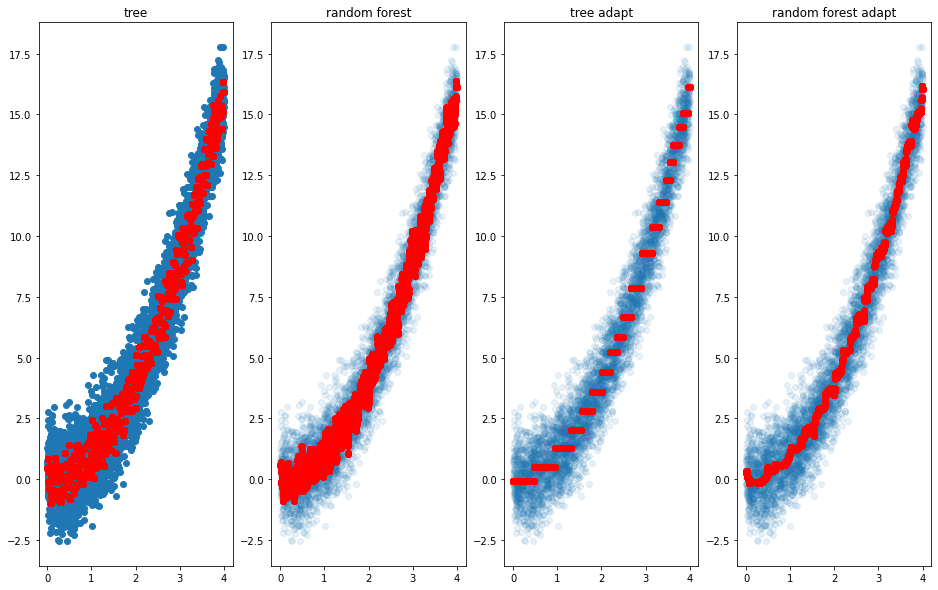

In [49]:
plt.rcParams["figure.figsize"] = (16,10)
rf = RandomForestRegressor(200, min_samples_leaf=5).fit(X1,y1) #RandomForest(300,criterion="mse", adaptive_complexity=False).fit(X1,y1)
rf_adapt = RandomForest(300,criterion="mse", adaptive_complexity=True).fit(X1,y1)
t = BaseLineTree(criterion="mse",adaptive_complexity=False).fit(X1,y1)
#t = RandomForestRegressor(300,min_samples_leaf=5,random_state=0).fit(X1,y1)
t_adapt = BaseLineTree(criterion="mse",adaptive_complexity=True).fit(X1,y1)
#rf2 = RandomForestRegressor(200, min_samples_leaf=5).fit(X1,y1)
t_pred = t.predict(X)
rf_pred = rf.predict(X)
rf_adapt_pred = rf_adapt.predict(X)
#rf2_pred = rf2.predict(X)
t_adapt_pred = t_adapt.predict(X)



plt.subplot(1,4,1)
plt.scatter(X,y)

plt.scatter(X[:,0],t_pred[:],c ="red")
plt.title("tree")

plt.subplot(1,4,2)
plt.scatter(X[:,0],y, alpha = 0.1)

plt.scatter(X[:,0],rf_pred[:],c ="red")
plt.title("random forest")

plt.subplot(1,4,3)
plt.scatter(X[:,0],y, alpha = 0.1)

plt.scatter(X[:,0],t_adapt_pred[:],c ="red")
plt.title("tree adapt")

plt.subplot(1,4,4)
plt.scatter(X[:,0],y, alpha = 0.1)

plt.scatter(X[:,0],rf_adapt_pred[:],c ="red")
plt.title("random forest adapt")
plt.show()

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd 
import datapreprocess


SEED = 0
EPSILON = 1.1

def S1(pred1, pred2):
    return np.std(np.log((pred2+EPSILON)/(pred1+EPSILON)))#np.mean((pred1- pred2)**2)#

def S2(pred1, pred2):
    return np.mean(abs(pred1- pred2))

parameters = {'max_depth':[None, 5, 10],"min_samples_leaf": [5]} # , 
clf = GridSearchCV(DecisionTreeRegressor(random_state=0), parameters)

# from examples in R package ISLR2, https://cran.r-project.org/web/packages/ISLR2/ISLR2.pdf
datasets =["Boston", "Carseats","College", "Hitters", "Wage"]
targets = ["medv", "Sales", "Apps", "Salary", "wage"]
features =  [[ "crim", "rm"], ["Advertising", "Price"], ["Private", "Accept"], ["AtBat", "Hits"], ["year", "age"] ]
SEED = 0
EPSILON = 1.1

models = {  
            "baseline": RandomForest(100),
                 "NU": NaiveRandomForest(100),
                "TR":ReevaluateRandomForest(100),
                "sklearnRF":RandomForestRegressor(100, min_samples_leaf=5),
                "ABU":AbuRandomForest(100)
            }

stability_all = {name:[] for name in models.keys()}
standard_stability_all= {name:[] for name in models.keys()}
mse_all= {name:[] for name in models.keys()}
for ds,target, feature in zip(datasets,targets, features):
    iteration = 1
    kf = RepeatedKFold(n_splits= 5,n_repeats=10, random_state=SEED)
    data = pd.read_csv("data/"+ ds+".csv") # load dataset
    
    # data preperation
    # data = data.dropna(axis=0, how="any") # remove missing values if any
    # data = data.loc[:, feature + [target]] # only selected feature and target variable
    # cat_data = data.select_dtypes("object") # find categorical features
    # if not cat_data.empty: # if any categorical features, one-hot encode them
    #     cat_data = pd.get_dummies(data.select_dtypes("object"), prefix=None, prefix_sep="_", dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
    #     data = pd.concat([data.select_dtypes(['int','float']),cat_data],axis=1)
    data = datapreprocess.data_preperation(ds)
    #print(data.corr())
    
    y = data[target].to_numpy()
    X = data.drop(target, axis=1).to_numpy()
    #if ds == "College":
    #    y = np.log(y)
   
    # initial model 
    
    stability = {name:[] for name in models.keys()}
    standard_stability = {name:[] for name in models.keys()}
    mse = {name:[] for name in models.keys()}
    train_stability = {name:[] for name in models.keys()}
    train_standard_stability = {name:[] for name in models.keys()}
    train_mse = {name:[] for name in models.keys()}
    orig_stability = {name:[] for name in models.keys()}
    orig_standard_stability = {name:[] for name in models.keys()}
    orig_mse = {name:[] for name in models.keys()}
    for train_index, test_index in kf.split(X):
        X_12, y_12 = X[train_index],y[train_index]
        X_test,y_test = X[test_index],y[test_index]
        X1,X2,y1,y2 =  train_test_split(X_12, y_12, test_size=0.5, random_state=SEED)
        clf.fit(X1,y1)
        params = clf.best_params_
        # initial model 
        criterion = "mse"
        models = {  
                 "baseline": RandomForest(100, criterion = criterion, adaptive_complexity=True),
                 "NU": NaiveRandomForest(100, criterion = criterion, adaptive_complexity=True),
                "TR":ReevaluateRandomForest(100, criterion = criterion, adaptive_complexity=True),
                "sklearnRF":RandomForestRegressor(100, min_samples_leaf=5),
                "ABU":AbuRandomForest(100, criterion = criterion, adaptive_complexity=True)
                }
        for name, model in models.items():
            model.fit(X1,y1)
            
            pred1 = model.predict(X_test)
            pred1_train = model.predict(X_12)
            pred1_orig= model.predict(X1)
            #print("before")
            if name == "sklearnRF":
                model.fit(X_12,y_12)
            else:
                model.update(X_12,y_12)
            #print("after")
            pred2 = model.predict(X_test)
            pred2_orig= model.predict(X1)
            pred2_train =  model.predict(X_12)

            orig_mse[name].append(mean_squared_error(pred2_orig,y1))
            orig_stability[name].append(S1(pred1_orig,pred2_orig))
            orig_standard_stability[name].append(S2(pred1_orig,pred2_orig))

            train_mse[name].append(mean_squared_error(pred2_train,y_12))
            train_stability[name].append(S1(pred1_train,pred2_train))
            train_standard_stability[name].append(S2(pred1_train,pred2_train))
            mse[name].append(mean_squared_error(y_test,pred2))
            stability[name].append(S1(pred1,pred2))
            standard_stability[name].append(S2(pred1,pred2))
        

    print(ds)
    for name in models.keys():
        print("="*80)
        print(f"{name}")
        orig_mse_scale = np.mean(orig_mse["baseline"]); orig_S1_scale = np.mean(orig_stability["baseline"]); orig_S2_scale = np.mean(orig_standard_stability["baseline"]);
        train_mse_scale = np.mean(train_mse["baseline"]); train_S1_scale = np.mean(train_stability["baseline"]); train_S2_scale = np.mean(train_standard_stability["baseline"]);
        mse_scale = np.mean(mse["baseline"]); S1_scale = np.mean(stability["baseline"]); S2_scale = np.mean(standard_stability["baseline"]);
        
        print(f"orig - mse: {np.mean(orig_mse[name]):.3f} ({np.mean(orig_mse[name])/orig_mse_scale:.2f}), stability: {np.mean(orig_stability[name]):.3f} ({np.mean(orig_stability[name])/orig_S1_scale:.2f}), standard stability: {np.mean(orig_standard_stability[name]):.3f} ({np.mean(orig_standard_stability[name])/orig_S2_scale:.2f})")
        print(f"train - mse: {np.mean(train_mse[name]):.3f} ({np.mean(train_mse[name])/train_mse_scale:.2f}), stability: {np.mean(train_stability[name]):.3f} ({np.mean(train_stability[name])/train_S1_scale:.2f}), standard stability: {np.mean(train_standard_stability[name]):.3f} ({np.mean(train_standard_stability[name])/train_S2_scale:.2f})")
        print(f"test - mse: {np.mean(mse[name]):.3f} ({np.mean(mse[name])/mse_scale:.2f}), stability: {np.mean(stability[name]):.3f} ({np.mean(stability[name])/S1_scale:.2f}), standard stability: {np.mean(standard_stability[name]):.3f} ({np.mean(standard_stability[name])/S2_scale:.2f})")
        print("="*80)
        mse_all[name] += [score/mse_scale for score in mse[name]]
        stability_all[name] += [score/S1_scale for score in stability[name]]
        standard_stability_all[name] += [score/S2_scale for score in standard_stability[name]]
    print()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


In [52]:
from stabletrees.random_forest import RF
np.random.seed(0)
n = 5000

X = np.random.uniform(size=(n,1),low=0,high=4)
y = np.random.normal(loc=X.ravel()**2,scale=1,size = n)
X1,X2,y1,y2 = train_test_split(X,y,test_size=0.5,random_state=0)
X_test = np.random.uniform(size=(n,1),low=0,high=4)
y_test = np.random.normal(loc=X_test.ravel()**2,scale=1,size = n)
n_estimators = 300
criterion = "mse"
rf =  RF("base",n_estimators= n_estimators,max_features="all",criterion=criterion,min_samples_leaf=5).fit(X1,y1)
nrf = RF("nu",n_estimators= n_estimators,max_features="all",criterion=criterion,min_samples_leaf=5).fit(X1,y1)
# aburf = AbuRandomForest(n_estimators,adaptive_complexity=True).fit(X1,y1)
# rrf = ReevaluateRandomForest(n_estimators,adaptive_complexity=True).fit(X1,y1)
t = BaseLineTree(criterion="mse",adaptive_complexity=True).fit(X1,y1)
standard_rf = RandomForestRegressor(n_estimators,min_samples_leaf=5,random_state=0).fit(X1,y1)


standard_rf_pred1 = standard_rf.predict(X_test)
rf_pred1 = rf.predict(X_test)
nrf_pred1 = nrf.predict(X_test)
aburf_pred1 = aburf.predict(X_test)
rrf_pred1 = rrf.predict(X_test)
t_pred1 = t.predict(X_test)
print("initial:")
print(f"random forest:  {mean_squared_error(y_test,rf_pred1):.3f}")
print(f"naive forest: {mean_squared_error(y_test,nrf_pred1):.3f}")
print(f"abu forest: {mean_squared_error(y_test,aburf_pred1):.3f}")
print(f"reevaluate forest: {mean_squared_error(y_test,rrf_pred1):.3f}")
print(f"standard tree: {mean_squared_error(y_test,t_pred1):.3f}")
print(f"standard forest: {mean_squared_error(y_test,standard_rf_pred1):.3f}")
print("="*20, "\n")

rf.update(X,y)
nrf.update(X,y)
aburf.update(X,y)
rrf.update(X,y)
t.update(X,y)
standard_rf.fit(X,y)


def S2(pred1, pred2):
    return np.mean((pred1- pred2)**2)

rf_pred2 = rf.predict(X_test)
nrf_pred2 = nrf.predict(X_test)
aburf_pred2 = aburf.predict(X_test)
rrf_pred2 = rrf.predict(X_test)
t_pred2 = t.predict(X_test)
standard_rf_pred2 = standard_rf.predict(X_test)

print("update")
print(f"random forest: {mean_squared_error(y_test,rf_pred2):.3f}")
print(f"naive forest: {mean_squared_error(y_test,nrf_pred2):.3f}")
print(f"abu forest: {mean_squared_error(y_test,aburf_pred2):.3f}")
print(f"reevaluate forest: {mean_squared_error(y_test,rrf_pred2):.3f}")
print(f"standard tree: {mean_squared_error(y_test,t_pred2):.3f}")
print(f"standard forest: {mean_squared_error(y_test,standard_rf_pred2):.3f}")
print("="*20, "\n")
print("stability:")
print(f"random forest: {S2(rf_pred1,rf_pred2):.3f}")
print(f"naive forest: {S2(nrf_pred1,nrf_pred2):.3f}")
print(f"abu forest: {S2(aburf_pred1,aburf_pred2):.3f}")
print(f"reevaluate forest: {S2(rrf_pred1,rrf_pred2):.3f}")
print(f"standard tree: {S2(t_pred1,t_pred2):.3f}")
print(f"standard forest: {S2(standard_rf_pred1,standard_rf_pred2):.3f}")
print("="*20, "\n")



initial:
random forest:  23.483
naive forest: 23.483
abu forest: 1.003
reevaluate forest: 1.002
standard tree: 1.056
standard forest: 1.112

update
random forest: 23.486
naive forest: 23.486
abu forest: 1.003
reevaluate forest: 1.002
standard tree: 1.022
standard forest: 1.088

stability:
random forest: 0.001
naive forest: 0.001
abu forest: 0.000
reevaluate forest: 0.000
standard tree: 0.050
standard forest: 0.105



In [57]:
RF("base",300,criterion="mse",max_features="thrird", adaptive_complexity=False).fit(X1,y1)
rf.predict(X)

array([5.25489161, 5.25489161, 5.25489161, ..., 5.25489161, 5.25489161,
       5.25489161])

In [58]:
RF.forest

AttributeError: type object 'RF' has no attribute 'forest'

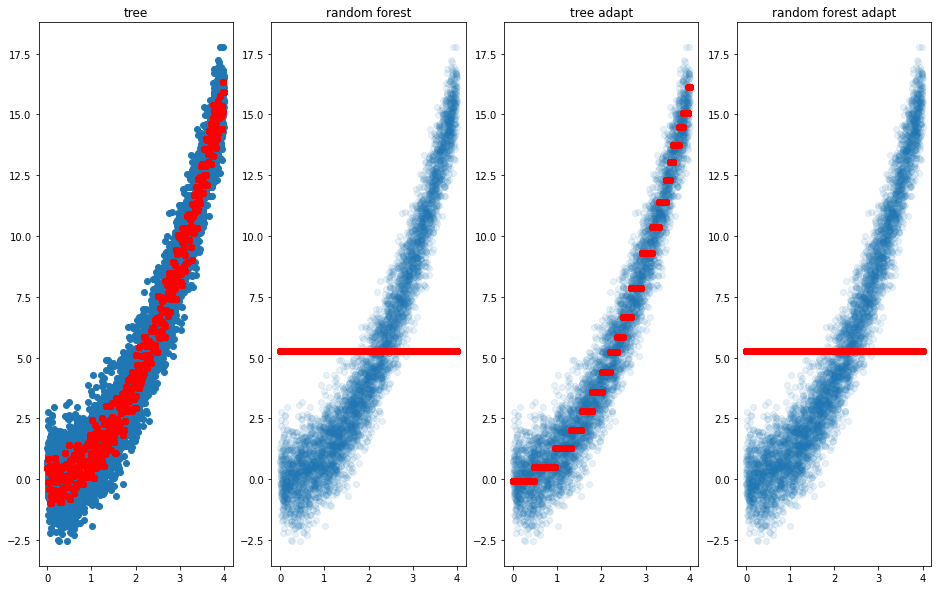

In [54]:
plt.rcParams["figure.figsize"] = (16,10)
rf = RF("base",300,criterion="mse", adaptive_complexity=False).fit(X1,y1)
rf_adapt = RF("base",300,criterion="mse", adaptive_complexity=True).fit(X1,y1)
t = BaseLineTree(criterion="mse",adaptive_complexity=False).fit(X1,y1)
#t = RandomForestRegressor(300,min_samples_leaf=5,random_state=0).fit(X1,y1)
t_adapt = BaseLineTree(criterion="mse",adaptive_complexity=True).fit(X1,y1)
#rf2 = RandomForestRegressor(200, min_samples_leaf=5).fit(X1,y1)
t_pred = t.predict(X)
rf_pred = rf.predict(X)
rf_adapt_pred = rf_adapt.predict(X)
#rf2_pred = rf2.predict(X)
t_adapt_pred = t_adapt.predict(X)



plt.subplot(1,4,1)
plt.scatter(X,y)

plt.scatter(X[:,0],t_pred[:],c ="red")
plt.title("tree")

plt.subplot(1,4,2)
plt.scatter(X[:,0],y, alpha = 0.1)

plt.scatter(X[:,0],rf_pred[:],c ="red")
plt.title("random forest")

plt.subplot(1,4,3)
plt.scatter(X[:,0],y, alpha = 0.1)

plt.scatter(X[:,0],t_adapt_pred[:],c ="red")
plt.title("tree adapt")

plt.subplot(1,4,4)
plt.scatter(X[:,0],y, alpha = 0.1)

plt.scatter(X[:,0],rf_adapt_pred[:],c ="red")
plt.title("random forest adapt")
plt.show()